<h2 style='color:blue' align='center'>People Classifier: Data Cleaning<h2>

In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [5]:
!pip install PyWavelets opencv-python seaborn

In [6]:
img = cv2.imread('./bhai1.jpg')
img.shape

(1280, 988, 3)

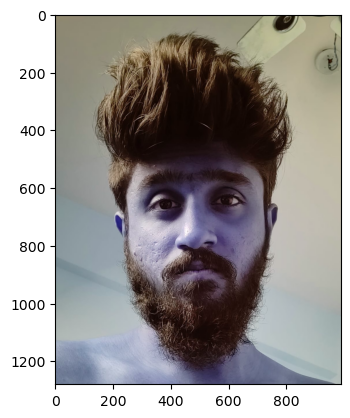

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1280, 988)

In [9]:
gray

array([[127, 127, 127, ...,  71,  88,  94],
       [127, 127, 127, ...,  78,  92,  96],
       [127, 127, 127, ...,  87,  96,  96],
       ...,
       [132, 132, 132, ..., 187, 187, 187],
       [131, 131, 132, ..., 187, 187, 187],
       [131, 131, 131, ..., 187, 187, 187]], dtype=uint8)

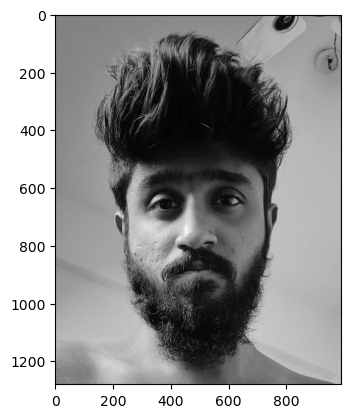

In [10]:
plt.imshow(gray, cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[152, 416, 643, 643]])

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h

(152, 416, 643, 643)

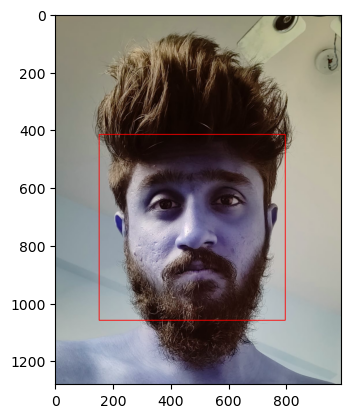

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

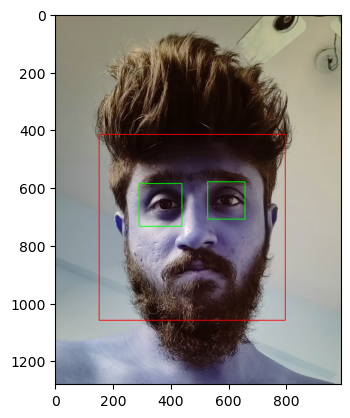

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

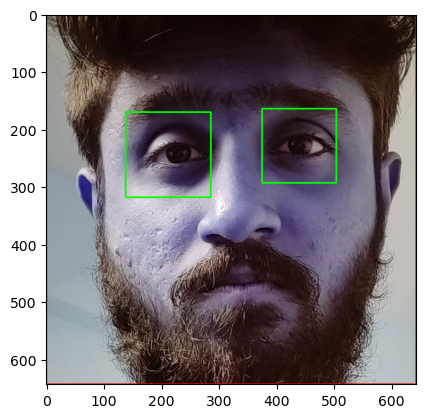

In [18]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

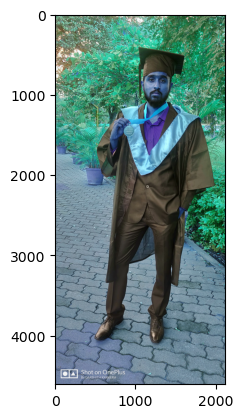

In [20]:
original_image = cv2.imread('./bhai2.jpg')
plt.imshow(original_image)

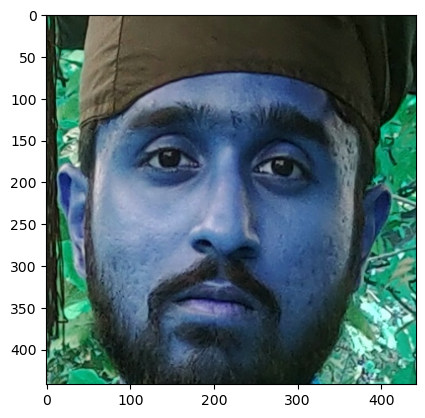

In [22]:
cropped_image = get_cropped_image_if_2_eyes('./bhai2.jpg')
plt.imshow(cropped_image)

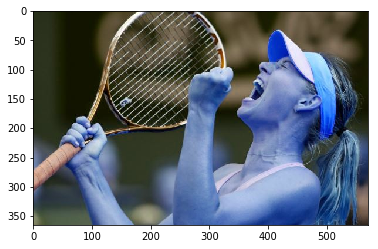

In [15]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

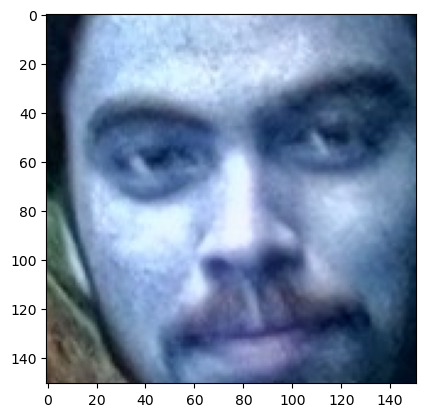

In [42]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/cropped/Deepu/Deepu19.png')
cropped_image_no_2_eyes
plt.imshow(cropped_image_no_2_eyes)

In [35]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/Bhai',
 './dataset/Deepu',
 './dataset/dsk',
 './dataset/Srujan',
 './dataset/Vaibhav']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [41]:
cropped_image_dirs = []
people_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    people_name = img_dir.split('/')[-1]
    print(people_name)
    
    people_file_names_dict[people_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + people_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = people_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            people_file_names_dict[people_name].append(cropped_file_path)
            count += 1    

Bhai
Generating cropped images in folder:  ./dataset/cropped/Bhai
Deepu
Generating cropped images in folder:  ./dataset/cropped/Deepu
dsk
Generating cropped images in folder:  ./dataset/cropped/dsk
Srujan
Generating cropped images in folder:  ./dataset/cropped/Srujan
Vaibhav
Generating cropped images in folder:  ./dataset/cropped/Vaibhav
